<a href="https://colab.research.google.com/github/rgnemasters/nfl-combine-draft-2022/blob/main/Data_Prep_and_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Header
**Ryan Masters**
*   3/17/2022
*   Disclosure: web-scraping method and code adapted from [DataQuest's 'Web Scraping NBA Stats With Python: Data Project [Part 1 of 3]](https://www.youtube.com/watch?v=JGQGd-oa0l4&t=1073s)





#Mount Data and Import Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [5]:
#Scrape combine data for 2000-2021 from Pro Football Reference
years = list(range(2000, 2022))

for year in years:
  data = requests.get(f'https://www.pro-football-reference.com/draft/{year}-combine.htm')
  with open('/content/drive/MyDrive/Project Notebooks/scraped pages/NFL_Combine_{}'.format(year), 'w+') as f:
    f.write(data.text)

#Web scraping and DF prep

In [6]:
#Parse scraped pages and load to list
from bs4 import BeautifulSoup

combine_stats = []

for year in years:
  with open('/content/drive/MyDrive/Project Notebooks/scraped pages/NFL_Combine_{}'.format(year)) as f:
    page = f.read()
    soup = BeautifulSoup(page, 'html.parser')
    table = soup.find(id='combine')
    table_read = pd.read_html(str(table))[0]
    table_read['Year'] = year
    combine_stats.append(table_read)


In [7]:
#Concatanate list and review DF
combine_table = pd.concat(combine_stats)
report = pd.DataFrame({'columns': combine_table.columns,
                       'dtype': combine_table.dtypes,
                       'uniques': combine_table.nunique(),
                       'nulls': combine_table.isna().sum(),
                       '% nulls': combine_table.isna().sum()/len(combine_table)}).reset_index(drop=True)
display(report)
combine_table.head()

,columns,dtype,uniques,nulls,% nulls
0,Player,object,7238,0,0.000000
1,Pos,object,23,0,0.000000
2,School,object,325,0,0.000000
3,College,object,2,1415,0.188893
4,Ht,object,20,29,0.003871
5,Wt,object,208,24,0.003204
6,40yd,object,160,385,0.051395
7,Vertical,object,59,1647,0.219864
8,Bench,object,46,2333,0.311440
9,Broad Jump,object,64,1715,0.228941


,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),Year
0,John Abraham,OLB,South Carolina,NaN,6-4,252,4.55,NaN,NaN,NaN,NaN,NaN,New York Jets / 1st / 13th pick / 2000,2000
1,Shaun Alexander,RB,Alabama,College Stats,6-0,218,4.58,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks / 1st / 19th pick / 2000,2000
2,Darnell Alford,OT,Boston Col.,NaN,6-4,334,5.56,25.0,23,94,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000
3,Kyle Allamon,TE,Texas Tech,NaN,6-2,253,4.97,29.0,NaN,104,7.29,4.49,NaN,2000
4,Rashard Anderson,CB,Jackson State,NaN,6-2,206,4.55,34.0,NaN,123,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000


In [8]:
#Drop 'College' column, as this functions just to house a hyperlink 
combine_table.drop(columns='College', inplace=True)

In [9]:
#Drop extra header rows 
combine_table.drop_duplicates(keep=False, inplace=True)
combine_table = combine_table.reset_index(drop=True)

In [10]:
#Convert numeric values to 'float' values
combine_table[['Wt', '40yd', 'Vertical',
       'Bench', 'Broad Jump', '3Cone', 'Shuttle']]=combine_table[['Wt', '40yd', 'Vertical',
       'Bench', 'Broad Jump', '3Cone', 'Shuttle']].astype(float)

combine_table.dtypes

Player                  object
Pos                     object
School                  object
Ht                      object
Wt                     float64
40yd                   float64
Vertical               float64
Bench                  float64
Broad Jump             float64
3Cone                  float64
Shuttle                float64
Drafted (tm/rnd/yr)     object
Year                     int64
dtype: object

In [11]:
combine_table.to_csv(path_or_buf='/content/drive/MyDrive/Project Notebooks/scraped pages/Combine_2000_2020.csv')

#Reformat/Split Columns and Check Nulls and Duplicates

In [12]:
print(combine_table.shape)
print(combine_table.info())
combine_table.head()

(7356, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7356 entries, 0 to 7355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               7356 non-null   object 
 1   Pos                  7356 non-null   object 
 2   School               7356 non-null   object 
 3   Ht                   7327 non-null   object 
 4   Wt                   7332 non-null   float64
 5   40yd                 6971 non-null   float64
 6   Vertical             5709 non-null   float64
 7   Bench                5023 non-null   float64
 8   Broad Jump           5641 non-null   float64
 9   3Cone                4700 non-null   float64
 10  Shuttle              4794 non-null   float64
 11  Drafted (tm/rnd/yr)  4714 non-null   object 
 12  Year                 7356 non-null   int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 747.2+ KB
None


,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),Year
0,John Abraham,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,New York Jets / 1st / 13th pick / 2000,2000
1,Shaun Alexander,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks / 1st / 19th pick / 2000,2000
2,Darnell Alford,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000
3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,NaN,2000
4,Rashard Anderson,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000


##Transforming 'Drafted' and 'Ht' columns

In [14]:
combine_table[['team','round','pick number', 'year']] = combine_table['Drafted (tm/rnd/yr)'].str.split(pat='/', expand=True)
combine_table.drop(columns = 'year', inplace=True)
combine_table

,Unnamed: 0,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),Year,team,round,pick number
0,0,John Abraham,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,New York Jets / 1st / 13th pick / 2000,2000,New York Jets,1st,13th pick
1,1,Shaun Alexander,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks / 1st / 19th pick / 2000,2000,Seattle Seahawks,1st,19th pick
2,2,Darnell Alford,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000,Kansas City Chiefs,6th,188th pick
3,3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,NaN,2000,NaN,NaN,NaN
4,4,Rashard Anderson,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000,Carolina Panthers,1st,23rd pick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,7351,Brock Wright,TE,Notre Dame,6-4,257.0,4.62,31.5,26.0,118.0,7.27,4.25,NaN,2021,NaN,NaN,NaN
7352,7352,Nahshon Wright,DB,Oregon St.,6-4,183.0,4.46,31.0,6.0,126.0,7.24,4.57,Dallas Cowboys / 3rd / 99th pick / 2021,2021,Dallas Cowboys,3rd,99th pick
7353,7353,Kenny Yeboah,TE,Mississippi,6-3,250.0,NaN,34.0,NaN,116.0,NaN,NaN,NaN,2021,NaN,NaN,NaN
7354,7354,Devonte Young,DB,Iowa,5-11,195.0,4.70,32.0,NaN,118.0,7.41,4.38,NaN,2021,NaN,NaN,NaN


In [15]:
#Remove strings from round and pick number columns
combine_table['round'] = combine_table['round'].str.replace('nd', '')
combine_table['round'] = combine_table['round'].str.replace('rd', '')
combine_table['round'] = combine_table['round'].str.replace('st', '')
combine_table['round'] = combine_table['round'].str.replace('th', '').astype(float)
combine_table['pick number'] = combine_table['pick number'].str.replace('nd', '')
combine_table['pick number'] = combine_table['pick number'].str.replace('rd', '')
combine_table['pick number'] = combine_table['pick number'].str.replace('th', '')
combine_table['pick number'] = combine_table['pick number'].str.replace('st', '')
combine_table['pick number'] = combine_table['pick number'].str.replace('pick', '').astype(float)
combine_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7356 entries, 0 to 7355
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7356 non-null   int64  
 1   Player               7356 non-null   object 
 2   Pos                  7356 non-null   object 
 3   School               7356 non-null   object 
 4   Ht                   7327 non-null   object 
 5   Wt                   7332 non-null   float64
 6   40yd                 6971 non-null   float64
 7   Vertical             5709 non-null   float64
 8   Bench                5023 non-null   float64
 9   Broad Jump           5641 non-null   float64
 10  3Cone                4700 non-null   float64
 11  Shuttle              4794 non-null   float64
 12  Drafted (tm/rnd/yr)  4714 non-null   object 
 13  Year                 7356 non-null   int64  
 14  team                 4714 non-null   object 
 15  round                4714 non-null   f

In [16]:
#Convert Ht column to inches, change dtype to float
#code adapted from https://stackoverflow.com/questions/26986655/changing-height-feet-and-inches-to-an-integer-in-python-pandas
def ht_convert(ht):
  height = ht.split("-")
  ft = float(height[0])
  ins = float(height[1])

  return (ft*12) + ins

In [17]:
#Remove NaNs to prevent dtype-related error in applying above function
combine_table.dropna(subset=['Ht'], inplace=True)

In [18]:
combine_table.isna().sum()

Unnamed: 0                0
Player                    0
Pos                       0
School                    0
Ht                        0
Wt                        0
40yd                    371
Vertical               1631
Bench                  2318
Broad Jump             1695
3Cone                  2635
Shuttle                2540
Drafted (tm/rnd/yr)    2628
Year                      0
team                   2628
round                  2628
pick number            2628
dtype: int64

In [19]:
combine_table['Ht'] = combine_table['Ht'].apply(ht_convert)

In [20]:
#Review converted data to double-check validity
combine_table['Ht'].describe()

count    7327.000000
mean       73.768937
std         2.640737
min        64.000000
25%        72.000000
50%        74.000000
75%        76.000000
max        82.000000
Name: Ht, dtype: float64

##Dropping unnecessary rows and reviewing nulls and duplicates

In [24]:
#Drop unnecessary rows
combine_table.drop(columns=['Unnamed: 0', 'Drafted (tm/rnd/yr)'], inplace=True)
combine_table.columns

Index(['Player', 'Pos', 'School', 'Ht', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'Year', 'team', 'round',
       'pick number'],
      dtype='object')

In [25]:
#Review nulls in normalized format 
round(combine_table.isna().sum() / len(combine_table), 2)

Player         0.00
Pos            0.00
School         0.00
Ht             0.00
Wt             0.00
40yd           0.05
Vertical       0.22
Bench          0.32
Broad Jump     0.23
3Cone          0.36
Shuttle        0.35
Year           0.00
team           0.36
round          0.36
pick number    0.36
dtype: float64

The NaNs from team, round, and pick number correspond to undrafted players, but more context is needed to understand other nulls so that each category can be properly imputed.

In [35]:
#Review NaNs for potential patterns
bench_null = combine_table['Bench'].isna() == True
cone_null = combine_table['3Cone'].isna() == True
shuttle_null = combine_table['Shuttle'].isna() == True
print('Bench Null Values:\n')
display(combine_table[bench_null].sample(10))
print('Cone Null Values:\n')
display(combine_table[cone_null].sample(10))
print('Shuttle Null Values:\n')
combine_table[shuttle_null].sample(10)

Bench Null Values:



,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,team,round,pick number
2660,Jamaal Charles,RB,Texas,71.0,200.0,4.38,30.5,NaN,122.0,6.80,4.22,2008,Kansas City Chiefs,3.0,73.0
3529,Tim Tebow,QB,Florida,75.0,236.0,4.71,38.5,NaN,115.0,6.66,4.17,2010,Denver Broncos,1.0,25.0
1342,Regis Crawford,OG,Arizona State,74.0,316.0,6.05,NaN,NaN,NaN,8.03,4.86,2004,NaN,NaN,NaN
2798,Shaheer McBride,WR,Delaware State,73.0,205.0,4.61,29.0,NaN,112.0,7.12,4.48,2008,NaN,NaN,NaN
5000,Durell Eskridge,S,Syracuse,75.0,208.0,4.56,31.0,NaN,117.0,7.09,4.26,2015,NaN,NaN,NaN
4030,DaJohn Harris,DT,USC,75.0,306.0,4.97,NaN,NaN,NaN,NaN,NaN,2012,NaN,NaN,NaN
764,Andre Gurode,OG,Colorado,76.0,316.0,5.34,30.5,NaN,100.0,8.15,5.05,2002,Dallas Cowboys,2.0,37.0
3053,Brian Hartline,WR,Ohio State,74.0,195.0,4.49,34.5,NaN,120.0,6.65,4.12,2009,Miami Dolphins,4.0,108.0
1066,Gerald Hayes,ILB,Pittsburgh,73.0,238.0,4.75,30.5,NaN,107.0,7.57,4.35,2003,Arizona Cardinals,3.0,70.0
1486,Shaun Phillips,DE,Purdue,75.0,255.0,4.78,33.0,NaN,114.0,6.95,4.23,2004,San Diego Chargers,4.0,98.0


Cone Null Values:



,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,team,round,pick number
1089,Bethel Johnson,WR,Texas A&M,71.0,201.0,4.38,38.5,NaN,127.0,NaN,NaN,2003,New England Patriots,2.0,45.0
3101,Andy Levitre,OG,Oregon State,75.0,305.0,5.33,30.5,23.0,103.0,NaN,4.52,2009,Buffalo Bills,2.0,51.0
1280,Doug Zeigler,TE,Mississippi,76.0,257.0,4.70,NaN,20.0,NaN,NaN,NaN,2003,NaN,NaN,NaN
4251,Alvin Bailey,OG,Arkansas,75.0,312.0,4.95,NaN,27.0,NaN,NaN,NaN,2013,NaN,NaN,NaN
3412,Matt Kopa,OT,Stanford,78.0,300.0,5.14,NaN,NaN,NaN,NaN,NaN,2010,NaN,NaN,NaN
5303,KJ Dillon,S,West Virginia,72.0,210.0,4.53,NaN,11.0,121.0,NaN,NaN,2016,Houston Texans,5.0,159.0
2327,Michael Bush,RB,Louisville,73.0,243.0,4.62,NaN,NaN,NaN,NaN,NaN,2007,Oakland Raiders,4.0,100.0
6332,Joe Giles-Harris,LB,Duke,74.0,234.0,4.75,29.5,17.0,111.0,NaN,NaN,2019,NaN,NaN,NaN
2308,H.B. Blades,ILB,Pittsburgh,71.0,236.0,4.69,NaN,22.0,NaN,NaN,NaN,2007,Washington Redskins,6.0,179.0
2928,Tom Zbikowski,S,Notre Dame,71.0,211.0,4.44,NaN,24.0,NaN,NaN,NaN,2008,Baltimore Ravens,3.0,86.0


Shuttle Null Values:



,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,team,round,pick number
6640,J.K. Dobbins,RB,Ohio State,69.0,209.0,NaN,NaN,23.0,NaN,NaN,NaN,2020,Baltimore Ravens,2.0,55.0
6838,Geno Stone,S,Iowa,70.0,207.0,4.62,33.5,12.0,116.0,NaN,NaN,2020,Baltimore Ravens,7.0,219.0
2037,Tamba Hali,DE,Penn State,75.0,275.0,4.87,NaN,NaN,NaN,NaN,NaN,2006,Kansas City Chiefs,1.0,20.0
6043,Chris Jones,CB,Nebraska,72.0,195.0,4.57,NaN,14.0,NaN,NaN,NaN,2018,NaN,NaN,NaN
4301,Alex Dunnachie,P,Hawaii,75.0,217.0,4.97,NaN,NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN
2354,A.J. Davis,CB,North Carolina State,70.0,193.0,4.56,NaN,16.0,NaN,NaN,NaN,2007,Detroit Lions,4.0,105.0
2413,DeAndre Jackson,CB,Iowa State,71.0,193.0,4.48,NaN,14.0,NaN,NaN,NaN,2007,NaN,NaN,NaN
535,Richard Newsome,S,Michigan State,71.0,203.0,4.59,NaN,14.0,NaN,NaN,NaN,2001,NaN,NaN,NaN
814,Antwan Lake,DE,West Virginia,76.0,288.0,5.08,NaN,27.0,NaN,NaN,NaN,2002,NaN,NaN,NaN
2702,Andre Fluellen,DT,Florida State,74.0,296.0,5.00,NaN,28.0,NaN,NaN,NaN,2008,Detroit Lions,3.0,87.0


In [38]:
#Review composition highest null categories to determine if imputing the mean will overly skew any category
high_null = ['Bench', '3Cone', 'Shuttle', 'Vertical']
combine_table[high_null].describe()

,Bench,3Cone,Shuttle,Vertical
count,5009.000000,4692.000000,4787.000000,5696.000000
mean,20.737473,7.283233,4.397013,32.908322
std,6.399846,0.417048,0.266728,4.204614
min,2.000000,6.280000,3.730000,17.500000
25%,16.000000,6.970000,4.200000,30.000000
50%,21.000000,7.190000,4.350000,33.000000
75%,25.000000,7.530000,4.560000,36.000000
max,49.000000,9.120000,5.560000,46.500000


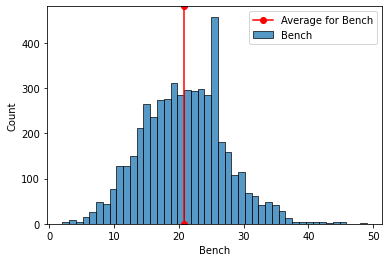

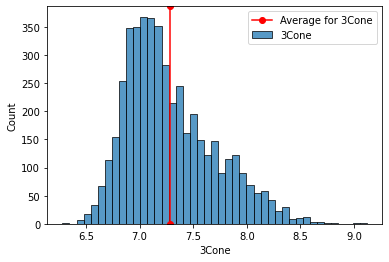

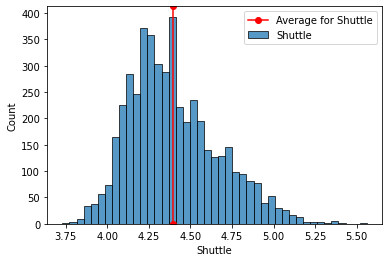

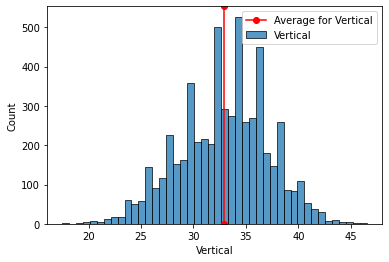

In [51]:
for data in high_null:
  fig, ax = plt.subplots();
  sns.histplot(data=combine_table, x = data, label=data)
  ax.axvline(x=combine_table[data].mean(), label = f'Average for {data}',
             marker='o', color='red')
  plt.legend()

There doesn't seem to be any pattern in the dataset's null values, so a simple 'mean' imputation strategy should suffice.

The range of the 3Cone and Shuttle data will keep the mean imputation from overly skewing that column. The standard deviation for the other two categories is much higher, but based on the histographical data, these subsets follow a normal Gaussian distribution. Imputing the mean therefore seems sound.

As far as **outliers**, these columns do not contain any meaningful outliers that would affect the overall performance of a predictive model.

In [23]:
combine_table.duplicated().sum()

0

##Manual imputation for non-drafted players

In [54]:
#Impute values to nulls in pick number, round, and team with non-drafted status
#These values will reflect non-drafted status in each category

combine_table['round'].fillna(8, inplace=True)
combine_table['pick number'].fillna(260, inplace=True)
combine_table['team'].fillna('Undrafted', inplace=True)
print(round(combine_table.isna().sum() / len(combine_table), 2))
combine_table.sample(15)

Player         0.00
Pos            0.00
School         0.00
Ht             0.00
Wt             0.00
40yd           0.05
Vertical       0.22
Bench          0.32
Broad Jump     0.23
3Cone          0.36
Shuttle        0.35
Year           0.00
team           0.00
round          0.00
pick number    0.00
dtype: float64


,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,team,round,pick number
3039,Mike Goodson,RB,Texas A&M,72.0,208.0,4.43,39.5,14.0,118.0,6.89,4.22,2009,Carolina Panthers,4.0,111.0
5881,Xavier Woods,S,Louisiana Tech,71.0,197.0,4.54,33.5,19.0,122.0,6.72,4.13,2017,Dallas Cowboys,6.0,191.0
3078,Peria Jerry,DT,Mississippi,74.0,299.0,4.98,NaN,NaN,NaN,NaN,NaN,2009,Atlanta Falcons,1.0,24.0
5359,Jordan Howard,RB,Indiana,72.0,230.0,4.57,34.0,16.0,122.0,NaN,NaN,2016,Chicago Bears,5.0,150.0
2857,William Robinson,OT,San Diego State,77.0,297.0,5.23,19.5,22.0,NaN,NaN,NaN,2008,Undrafted,8.0,260.0
6624,Cameron Dantzler,CB,Mississippi State,74.0,188.0,4.64,34.5,NaN,NaN,NaN,NaN,2020,Minnesota Vikings,3.0,89.0
2051,Taurean Henderson,RB,Texas Tech,69.0,204.0,4.62,32.5,NaN,112.0,7.01,4.40,2006,Undrafted,8.0,260.0
6099,Kendrick Norton,DT,Miami (FL),75.0,314.0,5.25,NaN,30.0,NaN,NaN,NaN,2018,Carolina Panthers,7.0,242.0
3464,Eric Norwood,OLB,South Carolina,73.0,245.0,4.71,36.5,NaN,115.0,7.08,4.23,2010,Carolina Panthers,4.0,124.0
1840,Donte Nicholson,S,Oklahoma,73.0,212.0,4.56,NaN,18.0,NaN,NaN,NaN,2005,Tampa Bay Buccaneers,5.0,141.0


#Final Overview and Analysis of the Data

Player 

Chris Brown         6
Brandon Williams    4
Brian Allen         4
Chris Jones         4
Mike Williams       4
                   ..
Drew Mormino        1
Jay Moore           1
Ryan Moore          1
Marvin Mitchell     1
Landon Young        1
Name: Player, Length: 7208, dtype: int64


Pos 

WR      1018
CB       723
RB       635
S        536
DE       507
OT       500
DT       475
OLB      430
TE       404
QB       401
OG       379
ILB      276
C        174
OL       139
P        137
LB       122
FB       120
DL       116
K        100
DB        59
EDGE      47
LS        29
Name: Pos, dtype: int64


School 

LSU               170
Florida           164
Alabama           163
Ohio State        163
Florida State     153
                 ... 
Western Oregon      1
Brown               1
Lane (TN)           1
Concordia (MN)      1
Fresno St.          1
Name: School, Length: 324, dtype: int64


team 

Undrafted                    2628
Baltimore Ravens              168
San Francisco 49ers 

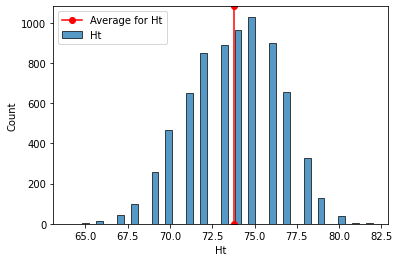

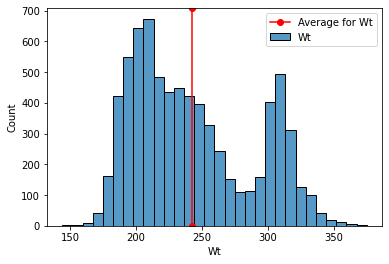

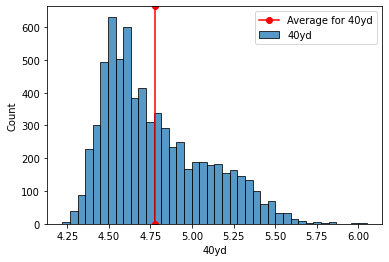

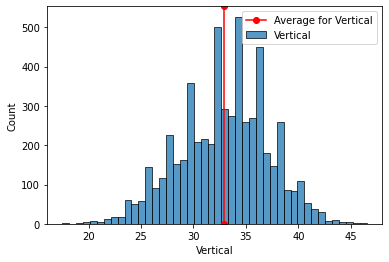

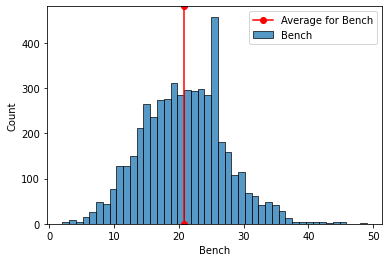

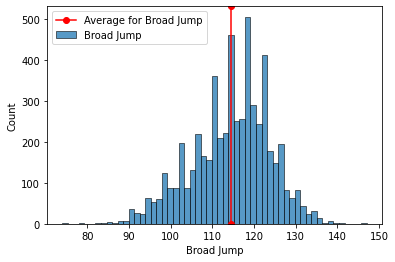

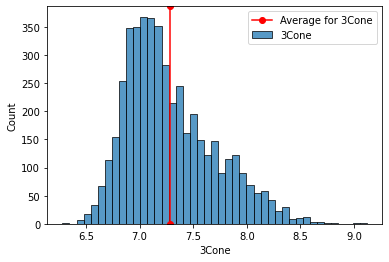

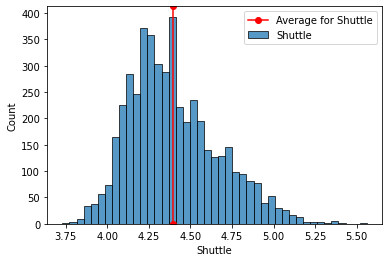

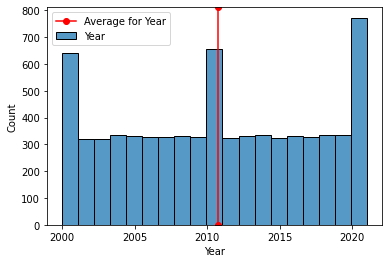

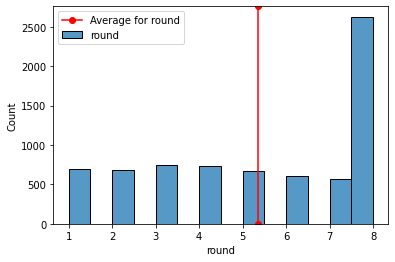

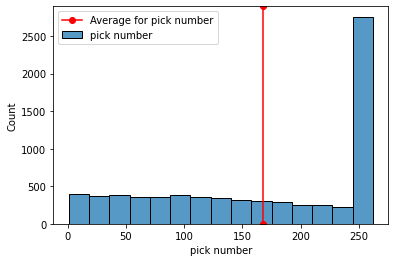

In [75]:
#Generate histograms for all data to produce overview of data for last check.
#Because of number of data points for Player, will review this in list. 
for data in combine_table.columns:
  if combine_table[data].dtypes.name == 'object':
    print(data, '\n')
    print(combine_table[data].value_counts())
    print('\n')
  else:
    fig, ax = plt.subplots();
    sns.histplot(data=combine_table, x = data, label=data)
    ax.axvline(x=combine_table[data].mean(), label = f'Average for {data}',
             marker='o', color='red')
    plt.legend()

**All data look consistent with expectations, without out-of-place outliers or inconsistencies in object values. A few exceptional cases are where round and pick number had values imputed based on their non-draft status.**

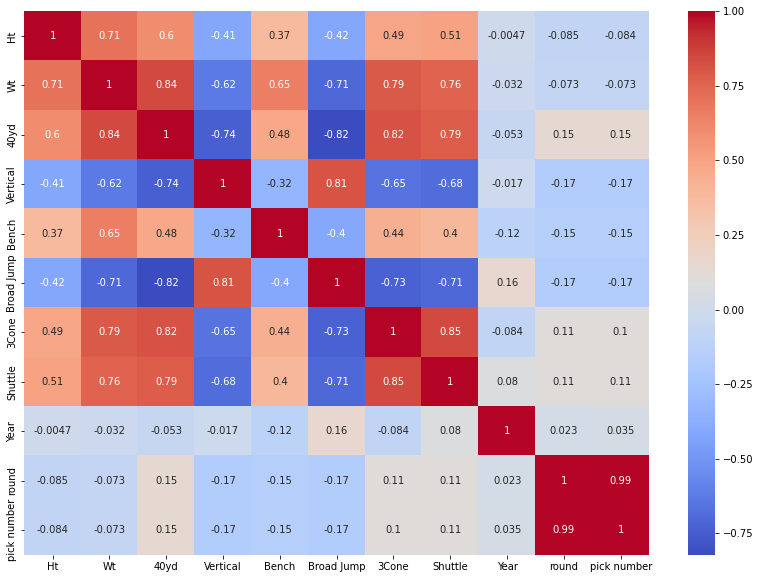

In [64]:
#Review data for correlated features
corr = combine_table.corr()
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', annot=True);

**My target value (pick number) does not have strong correlations with the other features of the dataset.**

**However, and as expected, all of the combine measurables have strong positive or negative correlations. This may make the Random Forest model appealing, as it does well to decorrelate features. A linear regression model may also work well since so many categories have a linear relationship.**